In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
lcn = pd.read_csv("LungCapData.csv")

In [3]:
lcn.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
lcn.Gender = le.fit_transform(lcn.Gender)
lcn.Smoke = le.fit_transform(lcn.Smoke)
lcn.Caesarean = le.fit_transform(lcn.Caesarean)

In [6]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


In [7]:
lcn_x = lcn.iloc[: , [1,2,3,4,5]]
lcn_y = lcn.iloc[: , 0]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
lcn_x_train , lcn_x_test , lcn_y_train, lcn_y_test = train_test_split(lcn_x, lcn_y, test_size = 0.2)

In [10]:
print(lcn_x_train.shape)
print(lcn_x_test.shape)

print("_______")

print(lcn_y_train.shape)
print(lcn_y_test.shape)

(580, 5)
(145, 5)
_______
(580,)
(145,)


In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [12]:
lm.fit(lcn_x_train , lcn_y_train)

LinearRegression()

In [13]:
pred_test = lm.predict(lcn_x_test)

pred_train = lm.predict(lcn_x_train)

In [14]:
lm.coef_

array([ 0.15923184,  0.26453727, -0.58213058,  0.36371472, -0.20584351])

In [15]:
lcn_x_train.columns

Index(['Age', 'Height', 'Smoke', 'Gender', 'Caesarean'], dtype='object')

In [16]:
lm.intercept_

-11.35644983699731

In [17]:
Rsquare = lm.score(lcn_x_train , lcn_y_train)
print("Rsquare value is ----->" , Rsquare)

Rsquare value is -----> 0.8554251924566147


In [18]:
Rsquare = lm.score(lcn_x_train , lcn_y_train)
N = lcn_x_train.shape[0]
K = lcn_x_train.shape[1]


AdjRsquare = 1 - (1- Rsquare) * (N - 1) / ( N - K -1)
AdjRsquare

0.8541658300215679

In [19]:
# Other evaluation metrices 

In [20]:
test_error = lcn_y_test - pred_test

In [21]:
import numpy as np

In [22]:
# On the test data
MSE = np.mean(test_error*test_error)

RMSE = np.sqrt(MSE)

MAE = np.mean(np.abs(test_error))

MAPE = np.mean(np.abs(test_error/lcn_y_test)*100)

print("MSE is ",  MSE  ,  "RSME is  "   ,  
      RMSE  ,    "MAE is  "   ,  MAE  ,   "MAPE is", MAPE)



MSE is  1.0028561196163528 RSME is   1.0014270415843347 MAE is   0.8121326484675233 MAPE is 12.009469726140734


In [23]:
Accuracy = 100 - MAPE
np.round(Accuracy)

88.0

In [24]:
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE


In [25]:
mean_squared_error(pred_test, lcn_y_test)

1.0028561196163523

In [26]:
mean_absolute_error(pred_test, lcn_y_test)

0.812132648467523

In [27]:
# error on the train data

In [28]:
error_train =  pred_train  - lcn_y_train

In [29]:
np.mean(error_train)

3.27630642922141e-15

(array([  5.,  12.,  64., 109., 139., 112.,  89.,  35.,  14.,   1.]),
 array([-3.03775681, -2.4024056 , -1.76705438, -1.13170316, -0.49635195,
         0.13899927,  0.77435049,  1.40970171,  2.04505292,  2.68040414,
         3.31575536]),
 <a list of 10 Patch objects>)

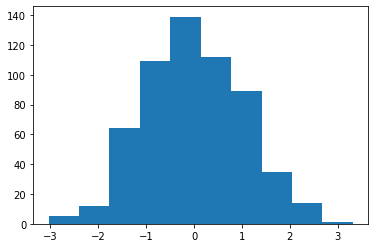

In [30]:
plt.hist(error_train)

In [31]:
import seaborn as sns 

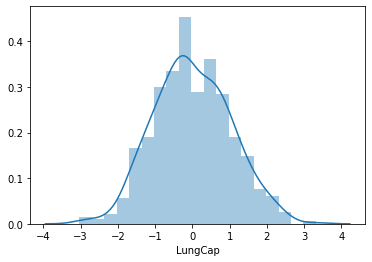

In [32]:
sns.distplot(error_train)

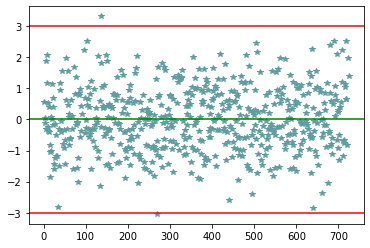

In [33]:
plt.plot(error_train, "*", color = "cadetblue")
plt.axhline(y = np.mean(error_train),color = "g")
plt.axhline(y = 3, color = "r")
plt.axhline(y = -3, color = "r")

In [34]:
#sns.jointplot( x ="Age", y = "LungCap", data = lcn , kind = "reg")


In [35]:
actual_predicted = pd.DataFrame({"Actual":lcn_y_train,"Predicted":pred_train})

In [36]:
actual_predicted

,Actual,Predicted
613,3.700,3.540055
268,7.975,6.815209
462,7.125,6.524727
572,6.900,6.107595
362,10.200,10.165239
...,...,...
707,5.275,5.823919
120,8.550,9.517055
223,9.000,6.955643
395,5.700,5.147605


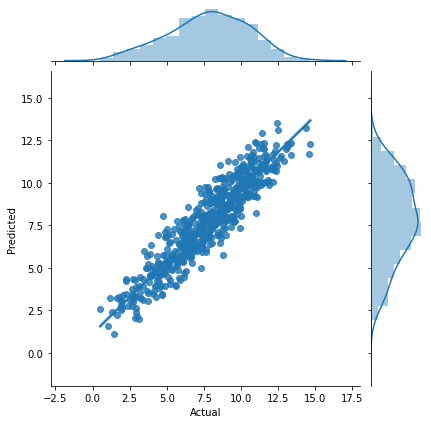

In [37]:
sns.jointplot( x ="Actual", y = "Predicted", data = actual_predicted , kind = "reg")

In [38]:
# Linear regressin on the property price data set

In [39]:
pa = pd.read_csv("Property_Price_Train.csv")

In [40]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [41]:
pa.isnull().sum()/pa.shape[0] * 100  # Percentage of null

Id                            0.000000
Building_Class                0.000000
Zoning_Class                  0.000000
Lot_Extent                   17.751885
Lot_Size                      0.000000
Road_Type                     0.000000
Lane_Type                    93.762851
Property_Shape                0.000000
Land_Outline                  0.000000
Utility_Type                  0.000000
Lot_Configuration             0.000000
Property_Slope                0.000000
Neighborhood                  0.000000
Condition1                    0.000000
Condition2                    0.000000
House_Type                    0.000000
House_Design                  0.000000
Overall_Material              0.000000
House_Condition               0.000000
Construction_Year             0.000000
Remodel_Year                  0.000000
Roof_Design                   0.000000
Roof_Quality                  0.000000
Exterior1st                   0.000000
Exterior2nd                   0.000000
Brick_Veneer_Type        

In [42]:
cols_to_droped = [ "Id","Lane_Type", "Pool_Quality","Fence_Quality","Miscellaneous_Feature","Fireplace_Quality"]

In [43]:
pa = pa.drop(cols_to_droped, axis = 1)

In [44]:
pa.shape

(1459, 75)

In [45]:
pa.Lot_Extent  = pa.Lot_Extent.fillna(pa.Lot_Extent.mean())
pa.Basement_Height.fillna('TA' , inplace = True)
pa.Exposure_Level.fillna('No' , inplace = True)
pa.BsmtFinType1.fillna('Unf' , inplace = True)
pa.BsmtFinType2.fillna('Unf' , inplace = True)
pa.Electrical_System.fillna('SBrkr' , inplace = True)
pa.Garage.fillna('Attchd' , inplace = True)
pa.Garage_Finish_Year.fillna('Unf' , inplace = True)
pa.Garage_Quality.fillna('TA' , inplace = True)
pa.Garage_Condition.value_counts()
pa.Basement_Condition.fillna('TA' , inplace = True)
pa.Brick_Veneer_Type = pa.Brick_Veneer_Type.fillna("None")
pa.Garage_Built_Year = pa.Garage_Built_Year.fillna(pa.Garage_Built_Year.mean())
pa.Garage_Condition = pa.Garage_Condition.fillna("TA")



pa = pa.dropna()



In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
pa[pa.select_dtypes(include=["object"]).columns] = pa[pa.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [48]:
pa.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,4,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,7,0,2,2003.0,1,2,1085.793744,4,4,2,163.788080,69.596115,20.337934,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,4,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,2,1976.0,1,2,196.316304,4,4,2,198.900074,74.716033,15.039392,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,4,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,7,1,2,2001.0,1,2,218.068403,4,4,2,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,4,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,7,1,6,1998.0,2,3,696.996439,4,4,2,46.948018,40.181415,60.921821,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,4,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,7,1,2,2000.0,1,3,568.859882,4,4,2,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,8,4,250000


In [49]:
pa.shape

(1451, 75)

In [50]:
pa_x = pa.iloc[ : , 0:74]
pa_y = pa.iloc[ : , 74]

In [51]:
pa.Sale_Price.mean()

180637.88559614058

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
pa_x_train , pa_x_test , pa_y_train, pa_y_test = train_test_split(pa_x, pa_y, test_size = 0.2)

In [54]:
print(pa_x_train.shape)
print(pa_x_test.shape)

print("_______")

print(pa_y_train.shape)
print(pa_y_test.shape)

(1160, 74)
(291, 74)
_______
(1160,)
(291,)


In [55]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [56]:
lm.fit(pa_x_train , pa_y_train)

LinearRegression()

In [57]:
pa_pred_test = lm.predict(pa_x_test)

pa_pred_train = lm.predict(pa_x_train)

In [58]:
lm.coef_

array([-1.29482392e+02, -2.54998621e+03, -1.57670132e+02,  2.77339162e-01,
        2.90641926e+04, -9.59766507e+02,  3.37143714e+03, -4.13031254e+04,
       -6.29547794e+02,  1.05737452e+04,  2.96265340e+02, -7.06136190e+02,
       -8.94910991e+03, -2.61326265e+03, -1.75128013e+03,  1.10210955e+04,
        4.48289914e+03,  2.18347594e+02,  7.37835375e+01,  1.63114731e+03,
        2.80504835e+04, -8.52815664e+02,  1.79573758e+00,  4.25160496e+03,
        3.24175035e+01, -8.16244279e+03,  4.96985671e+02,  6.01490706e+02,
       -9.76993398e+03,  3.84195937e+03, -3.38120138e+03, -6.52189485e+02,
        4.11470190e+00,  9.43778015e+02,  1.29195459e+01, -6.44384443e+00,
        1.05904034e+01, -1.60334442e+03, -1.24701052e+03, -1.31987959e+03,
       -2.21967877e+02,  1.52930849e+01,  2.60806731e+01, -1.66453011e+01,
        2.47284568e+01,  7.52464688e+03,  2.13274943e+02,  1.91746116e+03,
       -3.72085542e+03, -2.26052835e+03, -3.87433426e+03, -7.04798867e+03,
        2.09598177e+03,  

In [59]:
pa_x_train.columns

Index(['Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size', 'Road_Type',
       'Property_Shape', 'Land_Outline', 'Utility_Type', 'Lot_Configuration',
       'Property_Slope', 'Neighborhood', 'Condition1', 'Condition2',
       'House_Type', 'House_Design', 'Overall_Material', 'House_Condition',
       'Construction_Year', 'Remodel_Year', 'Roof_Design', 'Roof_Quality',
       'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',


In [60]:
lm.intercept_

1476993.898668953

In [61]:
Rsquare_pa = lm.score(pa_x_train , pa_y_train)
print("Rsquare value for pa is ----->" , Rsquare)

Rsquare value for pa is -----> 0.8554251924566147


In [62]:
Rsquare = lm.score(pa_x_train , pa_y_train)
N = pa_x_train.shape[0]
K = pa_x_train.shape[1]


AdjRsquare = 1 - (1- Rsquare) * (N - 1) / ( N - K -1)
AdjRsquare

0.8362827726442575

In [63]:
# Other evaluation metrices 

In [64]:
pa_test_error = pa_y_test - pa_pred_test

In [65]:
import numpy as np

In [66]:
# On the test data
pa_MSE = np.mean(pa_test_error*pa_test_error)

pa_RMSE = np.sqrt(pa_MSE)

pa_MAE = np.mean(np.abs(pa_test_error))

pa_MAPE = np.mean(np.abs(pa_test_error/pa_y_test)*100)

print("pa_MSE:",pa_MSE   ,  "pa_RSME:",pa_RMSE  ,  "MAE:",pa_MAE  ,   "MAPE:",pa_MAPE)



pa_MSE: 1072078339.5126704 pa_RSME: 32742.60740247591 MAE: 20675.397203485147 MAPE: 11.028730272651014


In [67]:
pa_Accuracy = 100 - pa_MAPE

In [68]:
pa_Accuracy

88.97126972734898

In [69]:
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE


In [70]:
mean_squared_error(pa_pred_test, pa_y_test)

1072078339.5126704

In [71]:
mean_absolute_error(pa_pred_test, pa_y_test)

20675.397203485158

In [72]:
# error on the train data

In [73]:
pa_error_train =  pa_pred_train  - pa_y_train

In [74]:
np.mean(pa_error_train)

-8.931865209135516e-11

(array([  1.,   1.,   3.,  38., 848., 259.,   7.,   1.,   0.,   2.]),
 array([-286218.39349366, -225989.09382739, -165759.79416111,
        -105530.49449483,  -45301.19482855,   14928.10483773,
          75157.404504  ,  135386.70417028,  195616.00383656,
         255845.30350284,  316074.60316912]),
 <a list of 10 Patch objects>)

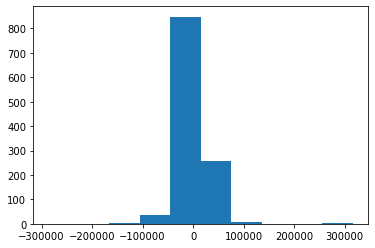

In [75]:
plt.hist(pa_error_train)

In [76]:
import seaborn as sns

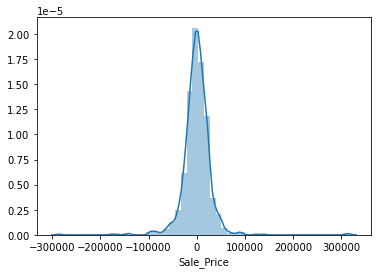

In [77]:
sns.distplot(pa_error_train)

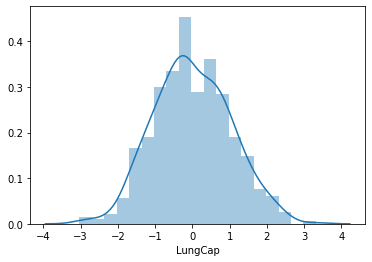

In [78]:
sns.distplot(error_train)

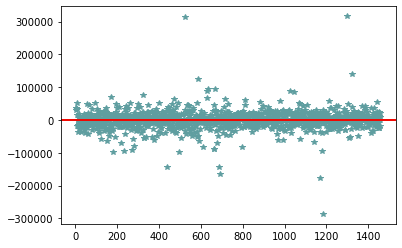

In [79]:
plt.plot(pa_error_train, "*", color = "cadetblue")
plt.axhline(y = np.mean(pa_error_train),color = "g")
plt.axhline(y = 3, color = "r")
plt.axhline(y = -3, color = "r")

In [80]:
#sns.jointplot( x ="Age", y = "LungCap", data = lcn , kind = "reg")

In [81]:
pa_actual_predicted = pd.DataFrame({"Actual":pa_y_train,"Predicted":pa_pred_train})
pa_actual_predicted

,Actual,Predicted
576,145000,154801.613373
725,120500,107284.274899
17,90000,97178.322450
1337,52500,55354.691323
489,86000,98156.372816
922,169990,187375.081748
165,127500,98803.695098
1361,260000,273741.077670
138,230000,255883.692079
1034,119750,120307.461057


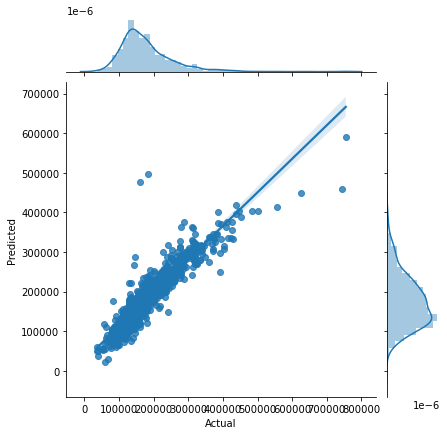

In [82]:
sns.jointplot( x ="Actual", y = "Predicted", data = pa_actual_predicted , kind = "reg")